# Cvičení 01: Úvod a vizualizace

## Import základních balíčků

### NumPy 
  * Balíček pro rychlé „vědecké“ výpočty (zejména lineární algebra a náhodná čísla).
  * Většinou se jedná jen o interface k vysoce optimalizovaným C/C++/Fortran knihovnám.
  * http://www.numpy.org/

### pandas
  * Oblíbený nástroj pro datovou analýzu.
  * Pomáhá usnadnit práci s tabulkovými daty.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Soubor nástrojů datové vědy psaný v Pythonu.
  * Staví na NumPy, [SciPy](https://www.scipy.org/) a matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Základní knihovna pro vykreslování grafů.
  * https://matplotlib.org/

### seaborn
  * Nástroj pro vizualizaci dat, založený na matplotlib.
  * https://seaborn.pydata.org/

## Explorace a validace dat, čištění

Let's show data exploration methods on [titanic dataset](https://www.kaggle.com/c/titanic/data) from [Kaggle](https://www.kaggle.com/). The dataset is devoted to predict survival (binary classification task).

## Základy práce s kinhovnou Pandas

![img/dataframe.png](img/dataframe.png)
*zdroj obrázku: [https://www.geeksforgeeks.org/creating-a-pandas-dataframe/](https://www.geeksforgeeks.org/creating-a-pandas-dataframe/)*

### Načítání dat
- Načítání dat z csv souborů do pandas typu DataFrame.
- Zkratka CSV znamená **comma** separated values.
    - Co asi může znamenat TSV/SSV? Jak je otevřít? 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Načtěte data z CSV souboru data1.csv
df = pd.read_csv('./data1.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65.0000,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.00,0,0,350042,7.7958,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.00,0,0,29108,11.5000,NaN,S


In [102]:
# Zkusíme si načást i data z CSV souboru data2.csv
df2 = pd.read_csv('./data2.csv',sep=';')

### Základní informace o datasetu

In [19]:
# Základní informace o dataframu (typy sloupců, počty hodnot)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# Zobrazit prvních/posledních k hodnot
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S


In [24]:
# Získat základní statistiky o datech (count, mean, std, min, max,..)
df.sample

<bound method NDFrame.sample of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
754          755         1       2   
755          756         1       2   
756          757         0       3   
757          758         0       2   
758          759         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                             

### Jak detekovat chybějící hodnoty v datasetu?
Data občas mohou v datasetu chybět. Co s tím?

By-default považuje Pandas za chybející hodnoty `None` nebo `numpy.NaN`. Ne tedy prázdný string `''` nebo `np.inf`.

In [36]:
# Vybereme pouze řádky (ne)obsahující missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            153
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          584
Embarked         1
dtype: int64

### Základy přístupu k datům 
Základní objekt v Pandas je `pd.Series`. `pd.DataFrame` je v podstatě kontejner na několik `pd.Series`.
- Všechny pandas objekty jsou 'value-mutable' ale ne vždy 'size-mutable'
    - length of a Series cannot be changed
    - but columns can be inserted into a DataFrame
- DataFrame obsahuje popsané osy (index řádku / název sloupce)

In [42]:
# Názvy sloupců v DataFrame
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [44]:
# Názvy řádků v DataFrame
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### Přístup ke sloupcům v DataFrame
- Přístup možný 2 způsoby:
    - `df["Age"]`
    - `df.Age`
- Po výběru jednoho sloupce již pracujeme s `pd.Series`!
- Pro tvorbu nového sloupce je nutné použít hranaté závorky
- Attribute access občas nejde použít (speciální název sloupce, mezery,..)

### Základy přístupu k datům 

In [55]:
# Vybereme sloupec Age (výsledkem je Series). Na ní vybereme prvních 10 hodnot.
df.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [58]:
# Vybereme sloupce "Age" a "Sex". Výsledekem je DataFrame!
df[["Age","Sex"]]

,Age,Sex
0,22.00,male
1,38.00,female
2,26.00,female
3,35.00,female
4,35.00,male
...,...,...
754,48.00,female
755,0.67,male
756,28.00,male
757,18.00,male


In [69]:
# Jak vybrat 3 a 4 řádek dataframe?
df.iloc[[3,4]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Filtrování dat
- Data filtrujeme aplikací listu booleans na Series/DataFrame
- Na sloupce můžeme využívat booleovské operátory

In [76]:
# Kolik lidí bylo starších 30 let?
df[(df["Age"]>30)]["PassengerId"].count()

257

In [81]:
# Kdo bydlel v kabině D33?
df[(df.Cabin == 'D33')]["Name"]

52     Harper, Mrs. Henry Sleeper (Myna Haxtun)
645                   Harper, Mr. Henry Sleeper
Name: Name, dtype: object

In [84]:
# Jak nalézt všechny jejichž jméno začíná na Goodwin?
df[df['Name'].str.startswith('Goodwin')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


## Úloha 01: Zřetězení dat

  - Připojte data2.csv za data1.csv následujícím způsobem:
      - Data (sloupce), která nejsou v data1.csv jsou v data2.csv vynechána.
      - Spočítejte věk pomocí sloupce BirthYear (rok narození) v data2.csv a uložte jej do sloupce Age.
      - PasangerId musí být unikátní. Nastavíme ho jako nový index.

In [106]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [108]:
# Načteme soubor data2.csv a zkontrolujeme, že sedí názvy sloupců a zbytečné odstraníme
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'BirthYear',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [107]:
df2.drop(columns=["FootSize"],inplace=True)

In [ ]:
df.merge(df2)

In [109]:
# V nově načteném df spočítáme věk cestujících
df2['Age'] = 1912 - df2.BirthYear

In [114]:
# Odstraníme zbytečné sloupce
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age'],
      dtype='object')

In [113]:
# Spojíme soubory data1.csv a data2.csv (existuje více způsobů). Všimněte si, že index nyní neodpovídá!
df2.drop(columns='BirthYear', inplace=True)

In [115]:
# Dává smysl, abychom použili PassengerID jako nový index. Ovšem obsahuje neunikátní hodnoty! Let's fix that.
df=pd.concat([df,df2],ignore_index=True)

In [116]:
# Nastavíme sloupec PassengerID jako nový index
df['PassengerId'].value_counts()

1      2
85     2
99     2
98     2
97     2
      ..
340    1
341    1
342    1
343    1
759    1
Name: PassengerId, Length: 759, dtype: int64

In [117]:
df['PassengerId'] = range(0,len(df))

In [118]:
df.set_index('PassengerId', drop=True, inplace=True)

In [ ]:
df

## Vizualizace pomocí pandas a seaborn
* Importujeme knihovny

In [120]:
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib umožňuje změnit styl na jiný, než defaultní
matplotlib.style.use('ggplot')

# Bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 

### Základní chování grafů

[]

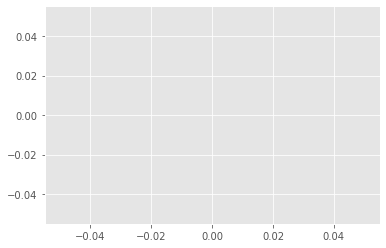

In [124]:
# Co se stane když pustíme graf bez žádných parametrů?
plt.plot()

### Běžně používané typy grafů
* Ukážeme si běžně používané typy grafů na věku pasažérů

(array([ 50.,  33., 164., 181., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

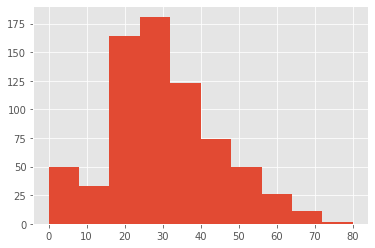

In [139]:
# Line chart
plt.hist(df.Age)

<AxesSubplot:ylabel='Frequency'>

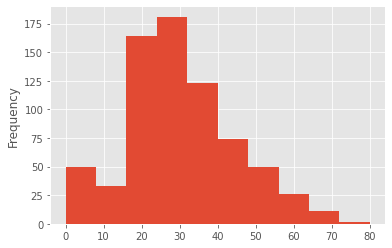

In [140]:
# Histogram. Správný graf pro tento usecase.
df.Age.plot(kind='hist')

<AxesSubplot:>

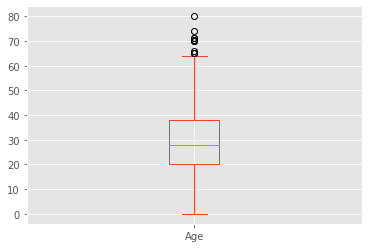

In [142]:
# Boxplot je taktéž vynikající graf
df.Age.plot(kind='box')

### Vizualizace závislosti na přežití

* Nejprve rozdělíme na dvě části - `survived` a `not_survived`

<AxesSubplot:ylabel='Frequency'>

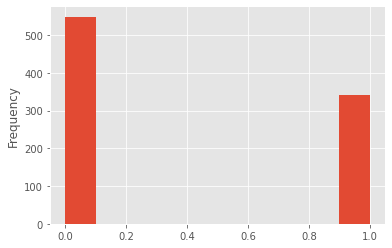

In [143]:
# Rozdělíme na survived a not_survived
df.Survived.plot(kind='hist')

* Podíváme se na závislost věku a třídy na přežití
    * Vzhledem k tomu, že se jedná o dvě proměné je potřeba dvourozměrný graf
    * Ideální bude scatter plot (ještě lepší by byl boxplot!)

In [ ]:
# df.boxplot nevyžaduje ani groupby


In [ ]:
# Vykreslíme do dvou scatter grafů


In [ ]:
# Lze vykreslit i do jednoho grafu (nutné předat axis objekt)


### Zobrazování subgrafů

* Co když chceme mí více grafů vedle sebe nebo i pod sebou?
* Dvě hlavní možnosti
    1. Metoda `plt.subplot`
    2. Metoda `plt.subplots`

In [ ]:
# Nastavíme velikost grafu (příliš malý graf je nečitelný)
plt.figure(figsize=(9,12)) # velikost figsize se určuje v palcích (angl. inches)

# První použijeme metodu plt.subplot
plt.subplot(321) # tři řádky a dva sloupce, přiřaď následující graf do prvního slotu
survived['Age'].plot.hist(color='Green')
plt.subplot(322)
not_survived['Age'].plot.hist(color='Black')
plt.subplot(323)
survived['Pclass'].plot.hist(color='Green')
plt.subplot(324)
not_survived['Pclass'].plot.hist(color='Black')
plt.subplot(325)
survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green')
plt.subplot(326)
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black')

plt.show()

In [ ]:
# Druhá možnost je metoda plt.subplots
fig, ax = plt.subplots(3, 2, figsize=(9,12))

survived['Age'].plot.hist(color='Green', ax=ax[0,0])
not_survived['Age'].plot.hist(color='Black', ax=ax[0,1])

survived['Pclass'].plot.hist(color='Green', ax=ax[1,0])
not_survived['Pclass'].plot.hist(color='Black', ax=ax[1,1])

survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green', ax=ax[2,0])
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black', ax=ax[2,1])

plt.show()

## Seaborne
* Využívá matplotlib
* Lze v ní snadno vytvořit grafy, které není snadné v matplotlibu napsat rychle
### Jak zjistit jaké mají příznaky vztahy mezi sebou?
* Chceme zjistit jak moc navzájem korelují jednotlivé příznaky
* Ideální graf na toto je heatmapa korelační matice

In [ ]:
# Heatmapa umí pracovat jen s číselnými hodnotami, je tedy nutné převést text na číselnou hodnotu


In [ ]:
# Vytvoříme korelační matici


In [ ]:
import seaborn as sns

# Zobrazení heatmapy


In [ ]:
# Stripplot podle x=Pclass a y=Age, hue=Survived, data=df


## Úloha 02: vytvořte bodový graf (scatter plot) pro všechny dvojice příznaků

  - K vykreslení všech (smysluplných) dvojic příznaků použijte metodu sns.pairplot, podobným způsobem jako metodu níže.

In [ ]:
# Použije Seaborn pairplot s tím, že nás zajímá přežití a chceme vidět histogramy na diagonále


## Stahování dat z webu pomocí Pythonu a pandas (1. úkol)
          
### Tipy pro scrapping s Pythonem:
   - K získání HTML zdrojáku stránky s `url` použijte `import requests`: 
      - `r = requests.get(url)`
      - `html = r.text`
   - Metoda `pandas.read_html(r.text)` uloží všechny tabulky `<table>` jako seznam pandas DataFrames:
      - `list_of_data_frames = pd.read_html(html,flavor='html5lib')`
   - Pro HTML parsování lze použít `from bs4 import BeautifulSoup`.

In [ ]:
import requests

In [ ]:
# příklad pro statutární město Kladno, výsledky voleb pro rok 2010
url = 'https://www.volby.cz/pls/kv2010/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2103&xobec=532053&xstat=0&xvyber=0'
dfs = pd.read_html(url,flavor='html5lib')

### Pro zajímavost (z předloňského roku): Příklad jednoduchého stažení dat z webu pomocí POST formuláře.

Úkolem je stáhnout všechna data z http://kap.ujak.cz/index.php a uložit je ve formátu pandas DataFrame.
#### První ukážeme variantu s pd.read_html

In [ ]:
# url s formulářem
url = 'https://kap.ujak.cz/index.php'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_all = pd.DataFrame()
for prace in ['BP', 'DP']:
    data['prace'] = prace
    r = requests.post(url, data=data)
    r.encoding='cp1250'
    ldf = pd.read_html(r.text,flavor='html5lib', header=0)
    df_ujak = ldf[0]
    strana = 30
    if data_all.shape[0] == 0:
        data_all = df.copy()
    else:
        data_all = pd.concat([data_all,df], ignore_index=True)
    while df.shape[0] > 0:
        if data_all.shape[0] > 200: # just to prevent from downloading all data
            break
        r = requests.post(url.format(strana), data)
        r.encoding='cp1250'
        ldf = pd.read_html(r.text,flavor='html5lib', header=0)
        df_ujak = ldf[0]
        strana = strana + 30
        data_all = pd.concat([data_all,df_ujak], ignore_index=True)

In [ ]:
data_all

#### Lze použít i requests a bs4
* Pokud se podíváme na původní stránku, můžeme si všimnout že název práce zároveň slouží jako odkaz na práci samotnou.
* Tento odkaz ale `pandas.read_html` nedokázalo extrahovat. 
* Zkusíme jej tedy extrahovat pomocí Beautiful Soup z bs4.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# url s formulářem
url = 'https://kap.ujak.cz/index.php'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

links = {'BP': [],
         'DP': []}

for prace in ['BP', 'DP']:
    data['prace'] = prace
    r = requests.post(url, data=data)
    r.encoding='cp1250'

    soup = BeautifulSoup(r.text, 'html.parser')  # Použije html parser na rozparsování stránky
    for line in soup.table.find_all('tr'):  # Z tabulky dostaneme všechny řádky
        links[prace].append(line.find('a').get('href'))  # Z každé řádky dostaneme odkaz na práci
    
    while len(links[prace]) > 0:  # Zpracování následujících stránek
        if len(links[prace]) > 200: # just to prevent from downloading all data
            break
        r = requests.post(url.format(strana), data)
        r.encoding='cp1250'
        soup = BeautifulSoup(r.text, 'html.parser')
        for line in soup.table.find_all('tr'):
            links[prace].append(line.find('a').get('href'))

In [ ]:
links_to_thesis = pd.DataFrame(links)
links_to_thesis

#### Další možností je použít přímo knihovnu pro scrapování
* Ukážeme si knihovnu `scrapy`
* Ve složce je soubor s názvem `ujak_crawler.py`
    * Tento script stáhne data o pracích i s linky na ně
    * Bohužel se špatně pouští v Jupyter Notebooku a tak jí pustíme přes shell

In [ ]:
!scrapy runspider crawler/ujak_crawler.py -o crawler/crawled_data.csv

### Pro zajímavost se můžeme podívat kolik prací se stejným názvem bylo na UJAK od roku 2000
* Tohoto se dá snadno docílit přes `groupby`

In [ ]:
# Načteme data z crawler/ujak.csv


In [ ]:
# Zjistíme počty prací se stejným názvem starších než v roce 2000 (filter, groupby, agregační operace)
